# Unit Testing

A unit test is a test that operates on an individual unit of software. A unit test aims to validate that the tested unit works as designed.
 
A unit is the smallest testable part of an application, such as a `function`, `method`, or `class`. Unit testing aims to validate that each unit of the software performs as expected.

In Python, there are several tools to help you write, organize, run, and automate your unit test. In the Python standard library, you’ll find two of these tools:

- **`doctest`:** Python’s doctest module is a lightweight testing framework that provides quick and straightforward test automation. It can read the test cases from your project’s documentation and your code’s docstrings. This framework is shipped with the Python interpreter as part of the batteries-included philosophy.
- **`unittest`:** The unittest package is also a testing framework. However, it provides a more complete solution than doctest. In the following sections, you’ll learn and work with unittest to create suitable unit tests for your Python code.

<p>Python’s <code>doctest</code> module is a lightweight <a href="https://en.wikipedia.org/wiki/Test_automation#Framework_approach_in_automation">testing framework</a> that provides quick and straightforward <a href="https://en.wikipedia.org/wiki/Test_automation">test automation</a>. It can read the test cases from your project’s documentation and your code’s docstrings. This framework is shipped with the Python interpreter as part of the batteries-included philosophy.</p>

<div class="alert alert-primary" role="alert">
<strong>Note:</strong>
<ul>
<li>To dive deeper into <code>doctest</code>, <a href="https://docs.python.org/3/library/doctest.html" target="_blank">https://docs.python.org/3/library/doctest.html</a></li>
<li>To dive deeper into <code>unittest</code>, <a href="https://docs.python.org/3/library/unittest.html" target="_blank">https://docs.python.org/3/library/unittest.html</a></li>
</ul>
</div>

<p>The <code>unittest</code> <a href="https://realpython.com/python-modules-packages/#python-packages">package</a> is also a testing framework. However, it provides a more complete solution than <code>doctest</code>. In the following sections, we will learn and work with <a href="https://docs.python.org/3/library/unittest.html#module-unittest"><code>unittest</code></a> to create suitable unit tests for your Python code.</p>

# Getting to Know Python’s unittest 

(For reference, please check: [https://realpython.com/python-unittest/](https://realpython.com/python-unittest/). Here I have just copied everything to learn more about the unit test.)

The `unittest` framework is directly available in the standard library, so we don’t have to install anything to use this tool.

The framework uses an object-oriented approach and supports some essential concepts that facilitate test creation, organization, preparation, and automation:

1. **Test case:** An individual unit of testing. It examines the output for a given input set.
2. **Test suite:** A collection of test cases, test suites, or both. They’re grouped and executed as a whole.
3. **Test fixture:** A group of actions required to set up an environment for testing. It also includes the teardown processes after the tests run.
4. **Test runner:** A component that handles the execution of tests and communicates the results to the user.

In the following sections, you’ll dive into using the unittest package to create test cases, suites of tests, fixtures, and, of course, run your tests.

### 1. Organizing Your Tests With the TestCase Class

The `unittest` package defines the `TestCase` class, which is primarily designed for writing unit tests. To start writing your test cases, you just need to import the class and subclass it. Then, you’ll add methods whose names should begin with test. These methods will test a given unit of code using different inputs and check for the expected results.

Here’s a quick test case that tests the built-in abs() function:


In [1]:
import unittest

class TestAbsFunction(unittest.TestCase):
    def test_positive_number(self):
        self.assertEqual(abs(10), 10)

    def test_negative_number(self):
        self.assertEqual(abs(-10), 10)

    def test_zero(self):
        self.assertEqual(abs(0), 0)

The `abs()` function takes a number as an argument and returns its absolute value. In this test case, you have three test methods. Each method checks for a specific input and output combination. To create the test case, you subclass the TestCase class and add three methods:
- The first method checks whether `abs()` returns the correct value when you pass a positive number. 
- The second method checks the expected behavior with a negative number. 
- Finally, the third method checks the return value of abs() when you use 0 as an argument.

Note that to check the conditions, you use the `.assertEqual()` method, which your class inherits from `TestCase`. 

### 2. Creating Test Cases

Before you write tests with `unittest`, you need some code to test. Suppose that you need to get a person’s age, process that information, and display their current life stage. For example, if the person’s age is:
- Between 0 and 9, both included, the function should return "Child".
- Greater than 9 and less than or equal to 18, the function should return "Adolescent".
- Greater than 18 and less than or equal to 65, the function should return "Adult".
- Greater than 65 and less than or equal to 150, the function should return "Golden age".
- Negative or greater than 150, the function should return "Invalid age".

In [2]:
# age.py
def categorize_by_age(age):
    if 0 <= age <= 9:
        return "Child"
    elif 9 < age <= 18:
        return "Adolescent"
    elif 18 < age <= 65:
        return "Adult"
    elif 65 < age <= 150:
        return "Golden age"
    else:
        return f"Invalid age: {age}"

In [6]:
categorize_by_age(5)

'Child'

In [5]:
categorize_by_age(10)

'Adolescent'

In [9]:
categorize_by_age(-20)

'Invalid age: -20'

This function should return correct results with different age values. To make sure that the function works correctly, you can write some unittest tests.

Following the pattern from the previous section, you’ll start by subclassing TestCase and add some methods that will help you test different input values and the corresponding results:

In [10]:
# test_age.py

import unittest

# from age import categorize_by_age

class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        self.assertEqual(categorize_by_age(5), "Child")

    def test_adolescent(self):
        self.assertEqual(categorize_by_age(15), "Adolescent")

    def test_adult(self):
        self.assertEqual(categorize_by_age(30), "Adult")

    def test_golden_age(self):
        self.assertEqual(categorize_by_age(70), "Golden age")

    def test_negative_age(self):
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")

    def test_too_old(self):
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")

In this example, you create a subclass of TestCase with the descriptive name TestCategorizeByAge. Note that the class name starts with Test, which is a widely used convention to make the purpose of the class immediately clear to anyone reading your code.

Also, note that the containing file is called `test_age.py`. By default, unittest supports test discovery based on the name of test modules. The default naming pattern is `test*.py`. Here, the asterisk (`*`) represents any sequence of characters, so starting your modules with test is recommended if you want to take advantage of the default test discovery configuration.

Then, you define six methods. Each method tests for an input value and the expected result. The methods use the `.assertEqual()` method from the parent class to check whether the function’s output equals the expected value.

Note that the tests above check every possible branch in the `categorize_by_age()` function. However, they don’t cover the boundary cases where the input age is the lower or upper limit of the interval. To make sure that the function responds as expected in those cases, you can add the following tests:

In [12]:
# test_age.py

import unittest

class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        self.assertEqual(categorize_by_age(5), "Child")               # assertEqual() from Parent class unittest

    def test_adolescent(self):
        self.assertEqual(categorize_by_age(15), "Adolescent")         # assertEqual() from Parent class unittest

    def test_adult(self):
        self.assertEqual(categorize_by_age(30), "Adult")              # assertEqual() from Parent class unittest

    def test_golden_age(self):
        self.assertEqual(categorize_by_age(70), "Golden age")         # assertEqual() from Parent class unittest

    def test_negative_age(self):
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")    # assertEqual() from Parent class unittest

    def test_too_old(self):
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")  # assertEqual() from Parent class unittest
        
    # for boundary values   
    def test_boundary_child_adolescent(self):
        self.assertEqual(categorize_by_age(9), "Child")               # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(10), "Adolescent")         # assertEqual() from Parent class unittest

    def test_boundary_adolescent_adult(self):
        self.assertEqual(categorize_by_age(18), "Adolescent")         # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(19), "Adult")              # assertEqual() from Parent class unittest

    def test_boundary_adult_golden_age(self):
        self.assertEqual(categorize_by_age(65), "Adult")              # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(66), "Golden age")         # assertEqual() from Parent class unittest

These test methods have two assertions each. The first assertion checks for the upper limit of the age interval, and the second assertion checks for the lower limit of the next age interval.

Using multiple assertions in a test method helps you reduce boilerplate code. For example, if you use a single assertion to write these tests, then you’ll have to write six test methods instead of just three. Each method will need a unique name, which can be a challenge.

In general, using multiple assertions in your test methods has the following pros:

- **Efficiency:** Multiple assertions in a single test can reduce repetitive code. It can also make tests run faster in those scenarios where you have setup and teardown requirements for each test.
- **Contextual testing:** Multiple assertions might be necessary to check that a function behaves correctly in a specific context.
- **Convenience:** Multiple assertions in a test can be more straightforward and less tedious to write compared to writing multiple single-assertion tests.

The approach also has its cons:

- **Clarity and isolation:** When a test with multiple assertions fails, it can be harder to immediately identify which assertion caused the failure. This can go against your debugging process.
- **Breakage risk:** When an early assertion in a test fails, subsequent assertions are not executed. This can hide additional issues.
- **Test purpose blurring:** When a test has multiple assertions, it can become less focused. This can make the test harder to understand.

With the test cases in place, you’re ready to run them and see whether your `categorize_by_age()` function works as expected.


### 3. Running unittest Tests

Once you’ve written the tests, you need a way to run them. You’ll have at least two standard ways to run tests with unittest:

1. **Make the test module executable:** To make a test module executable in unittest, you can add the following code to the end of the module:
    ```python 
      # test_age.py
      # add following at the end of the test_age.py file

      if __name__ == "__main__":
          unittest.main()
    ```
    The `main()` function from unittest allows you to load and run a set of tests. You can also use this function to make the test module executable. Once you’ve added these lines of code, you can run the module as a regular Python script: 
    ```python
    $ python test_age.py
    ```
    This command runs the tests from `test_age.py`. In the output, every dot represents a passing test. Then, you have a quick summary of the number of run tests and the execution time. All the tests passed, so you get an OK at the end of the output.

    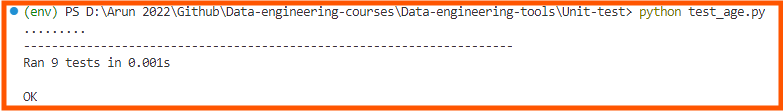

    Among other arguments, the `main()` function takes the `verbosity` one. With this argument, you can tweak the output’s verbosity, which has three possible values:

    - 0 for quiet
    - 1 for normal
    - 2 for detailed
  
    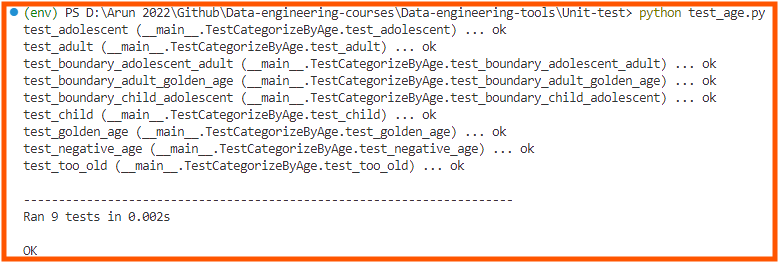

    This output is more detailed. It shows the tests and their result. At the end, it summarizes the test run as usual.

    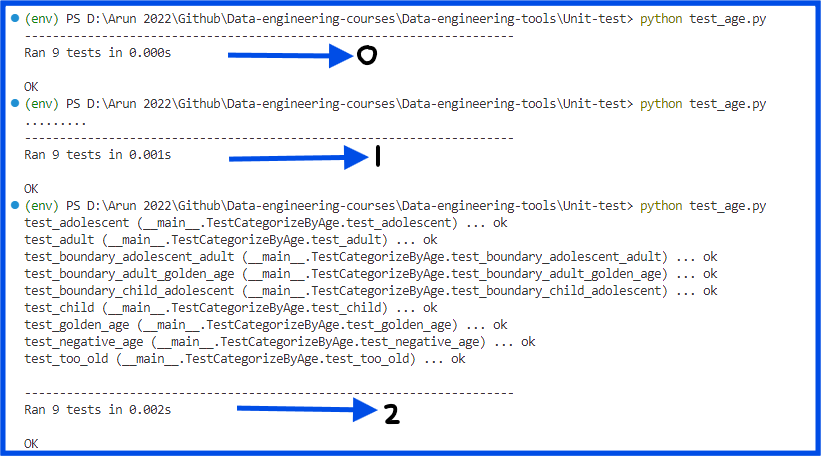

    If you want to make the detailed output more descriptive, then you can add docstrings to your tests like in the following code snippet:

    ```python
        class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        """Test for 'Child'"""
        self.assertEqual(categorize_by_age(5), "Child")

    def test_adolescent(self):
        """Test for 'Adolescent'"""
        self.assertEqual(categorize_by_age(15), "Adolescent")

    def test_adult(self):
        """Test for 'Adult'"""
        self.assertEqual(categorize_by_age(30), "Adult")

    def test_golden_age(self):
        """Test for 'Golden age'"""
        self.assertEqual(categorize_by_age(70), "Golden age")

    def test_negative_age(self):
        """Test for negative age"""
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")

    def test_too_old(self):
        """Test for too old"""
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")

    def test_boundary_child_adolescent(self):
        """Test for boundary between 'Child' and 'Adolescent'"""
        self.assertEqual(categorize_by_age(9), "Child")
        self.assertEqual(categorize_by_age(10), "Adolescent")

    def test_boundary_adolescent_adult(self):
        """Test for boundary between 'Adolescent' and 'Adult'"""
        self.assertEqual(categorize_by_age(18), "Adolescent")
        self.assertEqual(categorize_by_age(19), "Adult")

    def test_boundary_adult_golden_age(self):
        """Test for boundary between 'Adult' and 'Golden age'"""
        self.assertEqual(categorize_by_age(65), "Adult")
        self.assertEqual(categorize_by_age(66), "Golden age")
    ```

    then:

    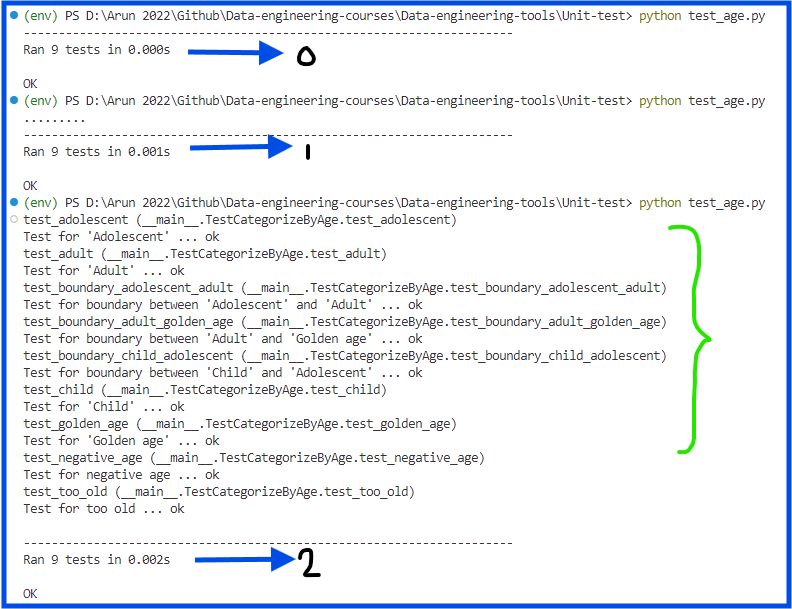
  
2. Use the command-line interface of unittest

## Getting to know python's doctest 

**References:** [https://docs.python.org/3/library/doctest.html](https://docs.python.org/3/library/doctest.html)

